In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [211]:
DataSet_file_path="C:/Users/Preetham Koundinya/sales_data_sample.csv"
df=pd.read_csv(DataSet_file_path)
df1=df.copy()  #copied for further use in an efficient way
print(df.head())

     SALES   ORDERDATE
0  2871.00   2-24-2003
1  2765.90  05-07-2003
2  3884.34  07-01-2003
3  3746.70   8-25-2003
4  5205.27  10-10-2003


In [212]:
df.dtypes

SALES        float64
ORDERDATE     object
dtype: object

In [213]:
df.isnull().sum()

SALES        0
ORDERDATE    0
dtype: int64

In [214]:
df['ORDERDATE']=pd.to_datetime(df.ORDERDATE, format='%m-%d-%Y')
df.sort_values(by='ORDERDATE',inplace=True)

In [215]:
df=df.groupby('ORDERDATE').sum()
df=df.resample(rule='MS').sum()
df.head()

,SALES
ORDERDATE,
2003-01-01,129753.60
2003-02-01,140836.19
2003-03-01,174504.90
2003-04-01,201609.55
2003-05-01,192673.11


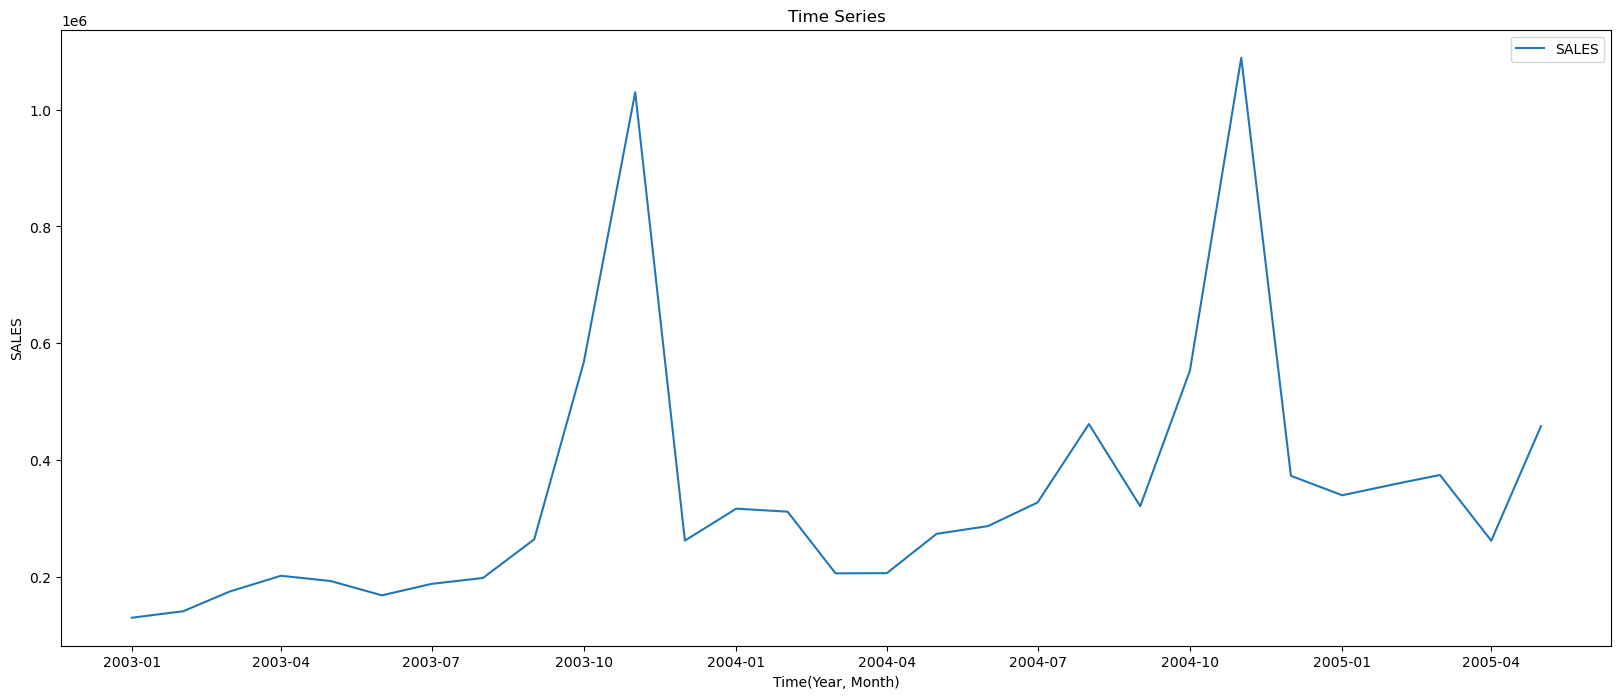

In [216]:
ts=df['SALES']
plt.figure(figsize = (20,8))
plt.plot(ts, label = 'SALES')
plt.title('Time Series')
plt.xlabel('Time(Year, Month)')
plt.ylabel("SALES")
plt.legend(loc = 'best')

# Modelling

In [217]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

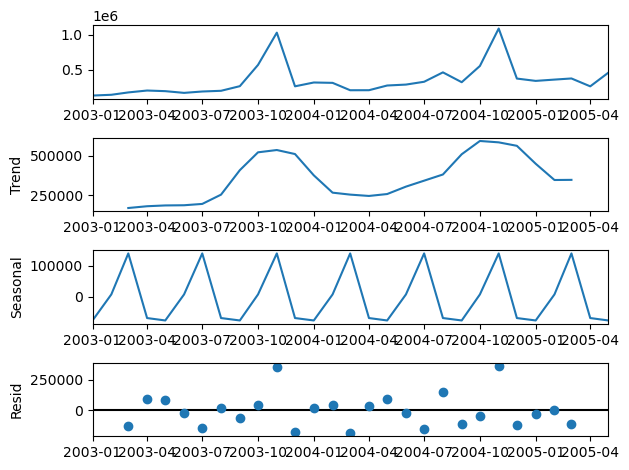

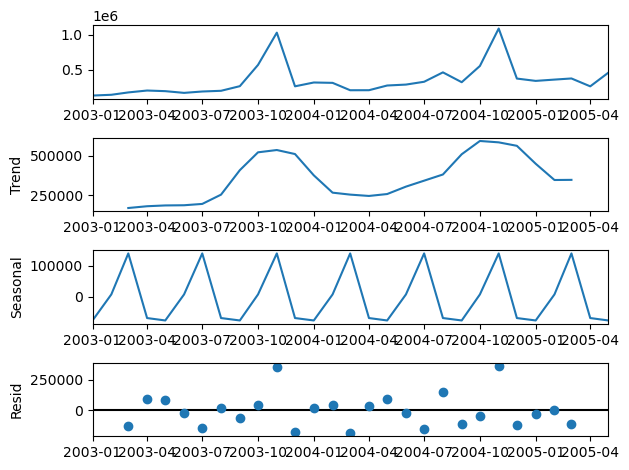

In [218]:
seasonal_decompose(df,model='additive',period=4).plot()

# Train and test

In [219]:
train=df[:18]
test=df[18:]
print(train.tail())
test.tail()

                SALES
ORDERDATE            
2004-02-01  311419.53
2004-03-01  205733.73
2004-04-01  206148.12
2004-05-01  273438.39
2004-06-01  286674.22


,SALES
ORDERDATE,
2005-01-01,339543.42
2005-02-01,358186.18
2005-03-01,374262.76
2005-04-01,261633.29
2005-05-01,457861.06


In [220]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwmodel=ExponentialSmoothing(train.SALES,trend='add',seasonal='add',seasonal_periods=4).fit()

In [221]:
test_pred=hwmodel.forecast(11)

<Axes: xlabel='ORDERDATE'>

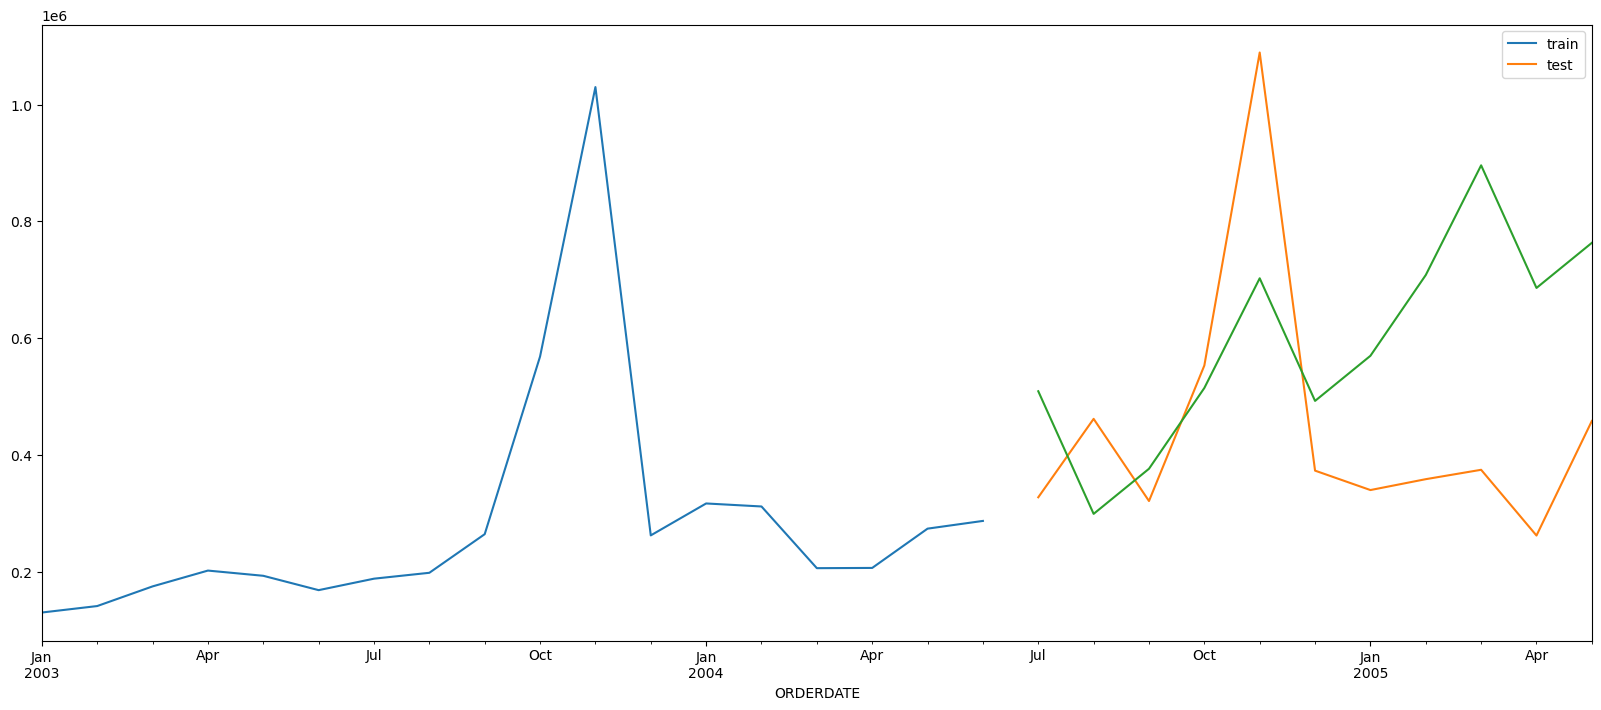

In [222]:
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
test_pred.plot()

# Model evaluation

In [223]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,test_pred))

293581.28797786497

In [224]:
df.SALES.mean()

345952.71896551724

## Forecast for entire model with holt's winter

In [225]:
hwmodel=ExponentialSmoothing(df.SALES,trend='add',seasonal='add',seasonal_periods=4).fit()
pred=hwmodel.forecast(10)

<Axes: xlabel='ORDERDATE'>

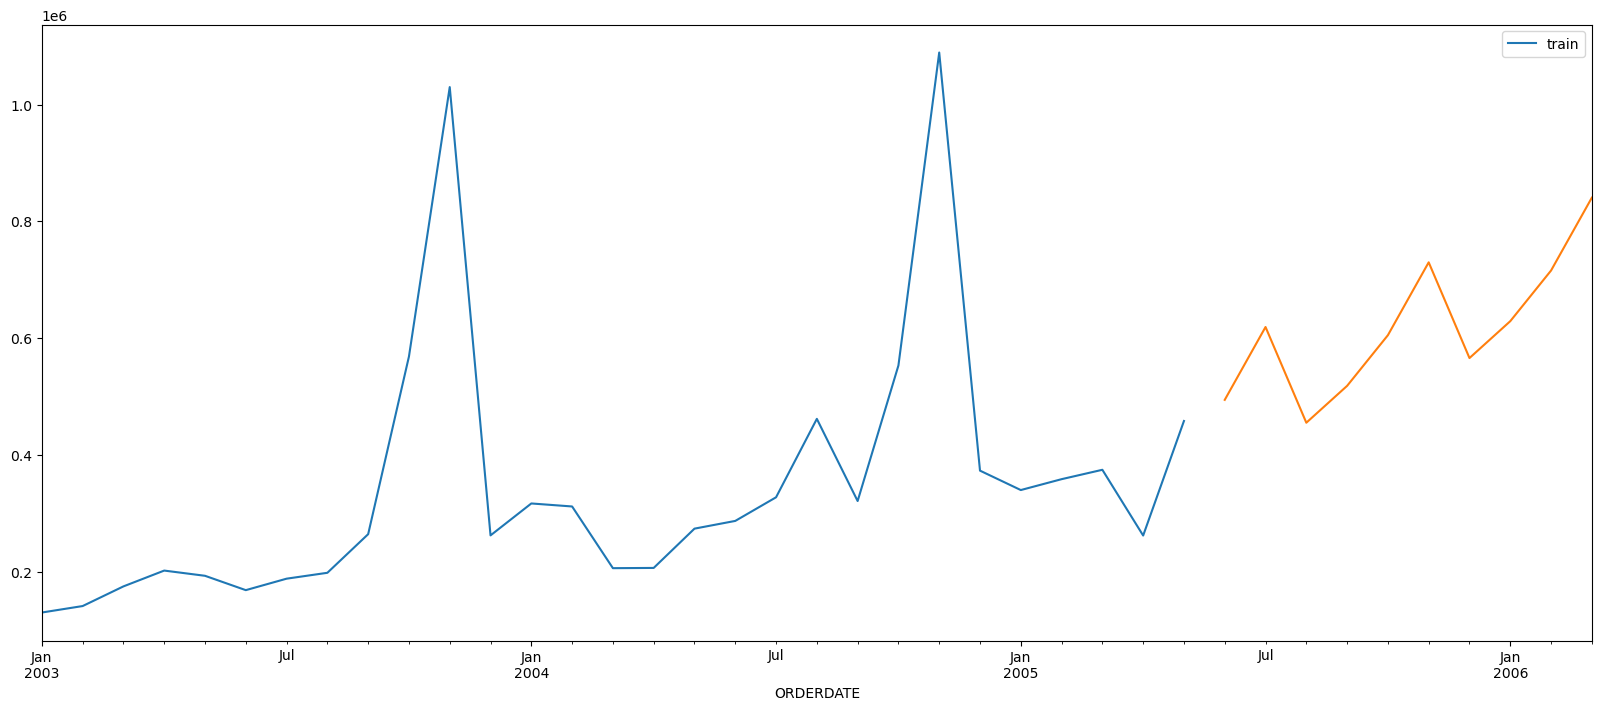

In [226]:
df['SALES'].plot(legend=True,label='train',figsize=(20,8))
pred.plot()

# Moving average

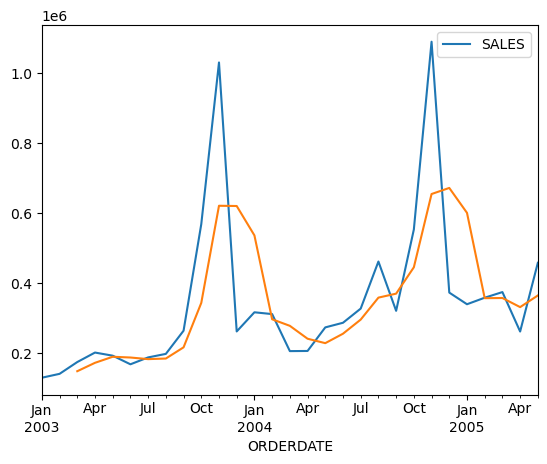

In [227]:
df.plot()
MOV= df['SALES'].rolling(window=3).mean().plot()

## ARIMA

In [228]:
from statsmodels.tsa.stattools import adfuller
ts=df['SALES'].resample('MS').sum()

In [229]:
ts.head()

ORDERDATE
2003-01-01    129753.60
2003-02-01    140836.19
2003-03-01    174504.90
2003-04-01    201609.55
2003-05-01    192673.11
Freq: MS, Name: SALES, dtype: float64

<Axes: xlabel='ORDERDATE'>

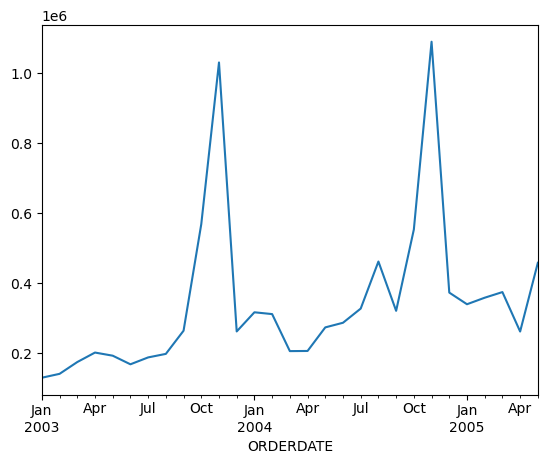

In [230]:
ts.plot()

Stationarity Check:

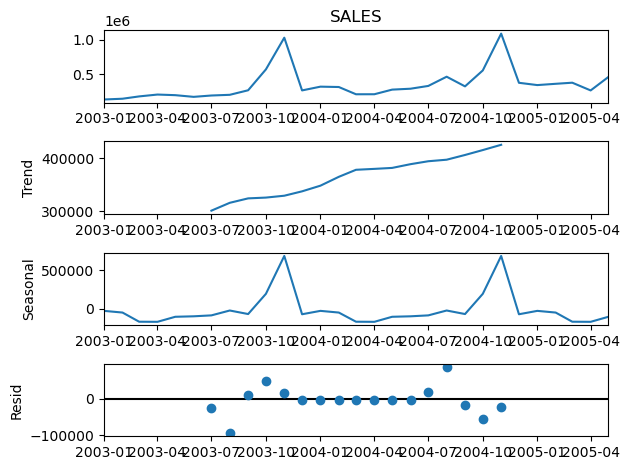

In [231]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()

In [232]:
adftest=adfuller(ts)
adftest[1]

0.005234006614207456

In [233]:
from statsmodels.tsa.arima.model import ARIMA
aim_model=ARIMA(train,order=(5,0,4)).fit()

In [234]:
 len(train), (len(ts)-1)

(18, 28)

In [235]:
#forecast(fc)
fc = aim_model.predict(start=len(train),end=len(ts)-1)
fc.head()

2004-07-01    384877.456971
2004-08-01    225155.974647
2004-09-01    340049.968036
2004-10-01    231040.593105
2004-11-01    336646.455332
Freq: MS, Name: predicted_mean, dtype: float64

In [236]:
np.sqrt(mean_squared_error(test,fc))

266707.932913391

In [237]:
test.mean(),np.sqrt(test.var())

(SALES    446877.990909
 dtype: float64,
 SALES    227743.173599
 dtype: float64)

<Axes: xlabel='ORDERDATE'>

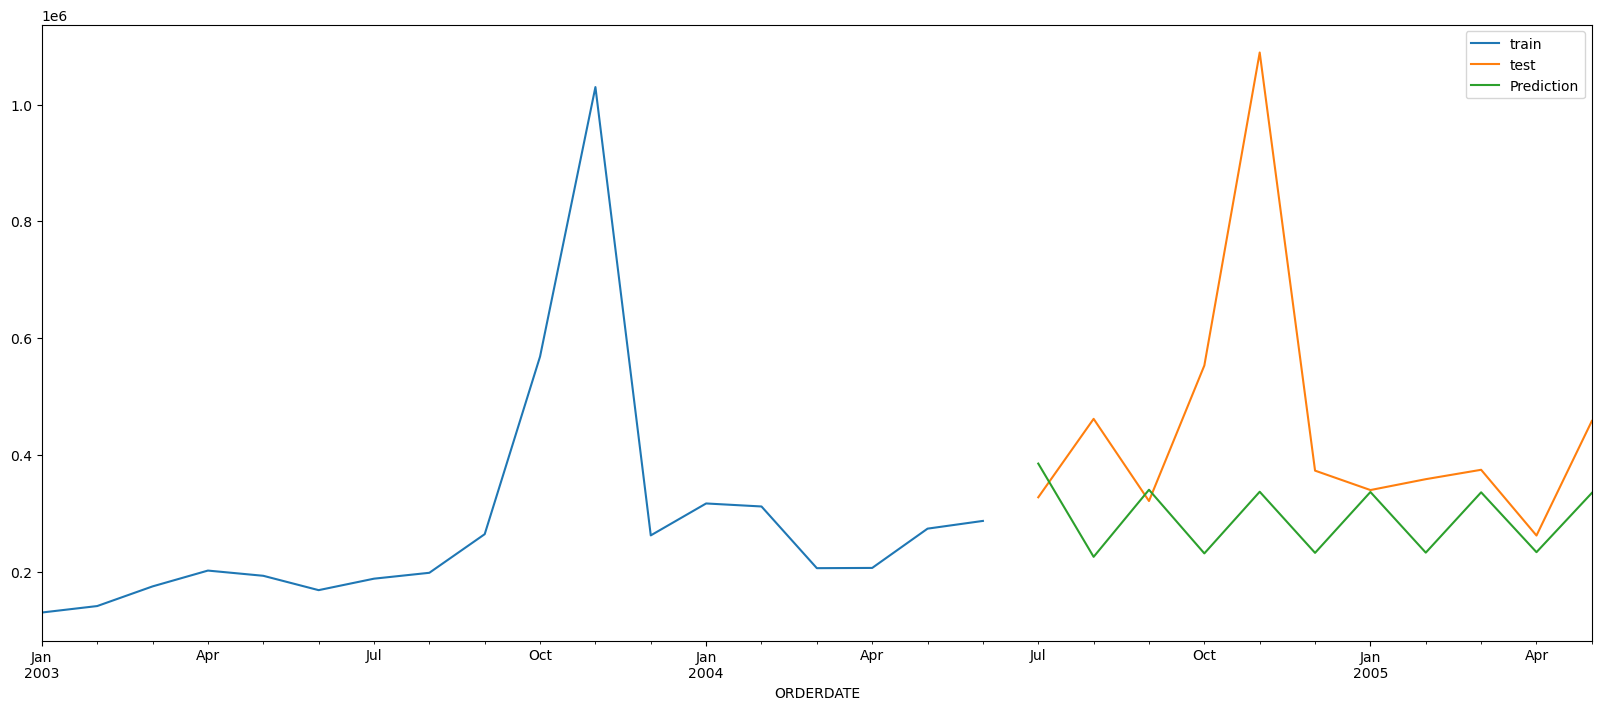

In [238]:
train['SALES'].plot(legend=True,label='train',figsize=(20,8))
test['SALES'].plot(legend=True,label='test',figsize=(20,8))
fc.plot(legend=True,label='Prediction')